In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
files.upload()

Saving online_shoppers_intention.csv.zip to online_shoppers_intention.csv.zip


{'online_shoppers_intention.csv.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\x04\xa0\x13S=)`4\xff\xff\xff\xff\xff\xff\xff\xff\x1d\x00\x14\x00online_shoppers_intention.csv\x01\x00\x10\x00\xbf[\x10\x00\x00\x00\x00\x00=\xf0\x03\x00\x00\x00\x00\x00\xb4\xbdY\xaf6\xdbq\x1ev\x1f \xff\xa4\xd3X\xf3pi\xc32\x10 v\x0cJq.\rF:R\x88H\xa4\xc0\xc1\x8e\xfe}\xea\xa95\xaf\xb7\xfb\xed\xea}\x98\xb37\x0f\xbf\x8f\xdc{\xbdk\xa8\xb9\x9e\xaa\xfaw\xff\xf0/\xbf\xfb\xfd\xef\xfe\xf4\xe7?\xfe\xf6\xcf\xbf\xfb\xef\xbf\x1c\xeb_\xff\xdb\x7f\xf8\x0b\xfe\xf0\x87\xdf\x1f\xff\xeb\xef\xff\xf1\x0f\x7f\xfc\x17\xfe\xf3o\xffy\xfd\xdb\xf8\xa1\xff\xf2\xc7?\xfc\xc3_\xfe\xfe\xcf\xbf\xf9\xe5\x9f\x7f\xfb\xe7_\xfea\xfb\xeb\xf8\xb1\x7f\xff\x87\xbf\xfc\xfe\xef\x7f\xf9\r\xfd\x8f\x7f:\xfe\xe6\xff\xfd\xdd\x9f\xcb\x9f\xfe\xcbo\xff\xe9\x97\xff\xfa\xdb\x7f\xfe\x0b\xfd\xf1o\xff\xf5\x97\xbf\xff\xddo\xff\xf9?\xfc\xf6\xdf\x8e\xff\xf4\x87\xdf\xff\xf9\xff>\xfe\xf7\x7f\xfd\x05\xbf\xfb\xfb\x7f\xfa\xdb\x7f\xfb\xd3\x9f\x7f\xf9\x97?\x1d\xff\xfe\x8f\x7f\xf8\x1f

In [4]:
!unzip online_shoppers_intention.csv.zip

Archive:  online_shoppers_intention.csv.zip
  inflating: online_shoppers_intention.csv  


In [5]:
raw_data = pd.read_csv('/content/online_shoppers_intention.csv')
raw_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
raw_data.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [7]:
raw_data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [8]:
raw_data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
num_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

In [10]:
cat_features = ['Month' ,'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

In [11]:
raw_data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [12]:
raw_data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [13]:
raw_data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [14]:
raw_data['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [15]:
raw_data['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [16]:
raw_data['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [17]:
print(raw_data['OperatingSystems'].value_counts())

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64


In [18]:
print(raw_data['Revenue'].value_counts())

False    10422
True      1908
Name: Revenue, dtype: int64


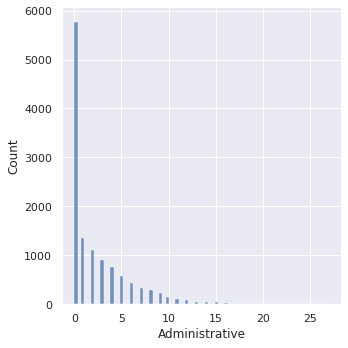

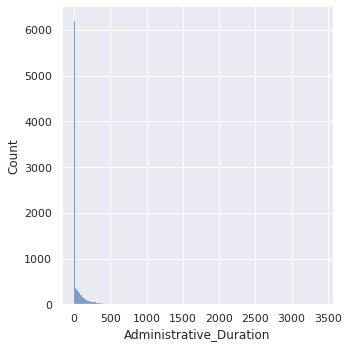

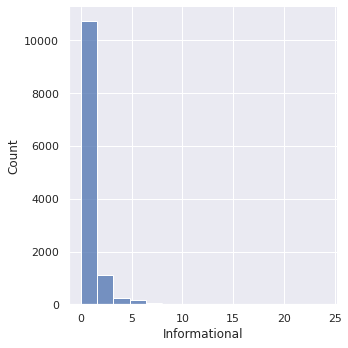

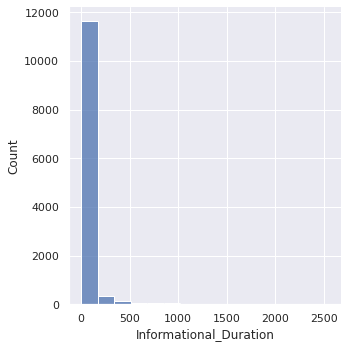

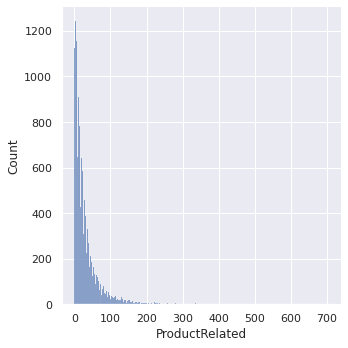

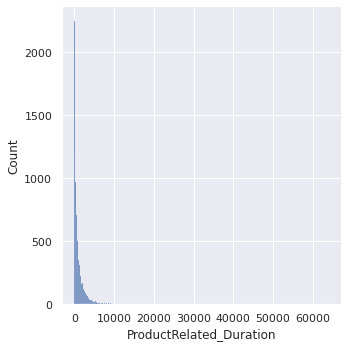

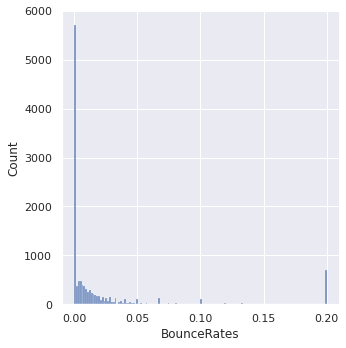

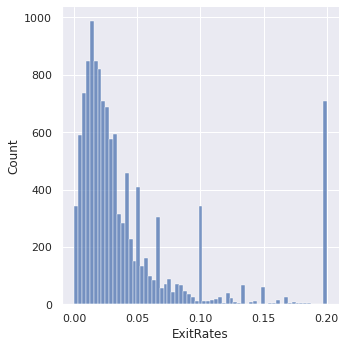

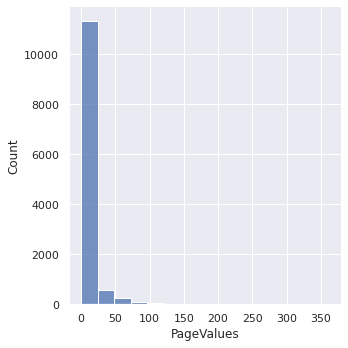

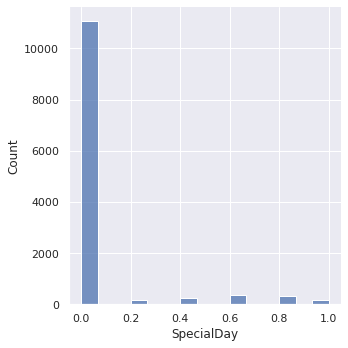

In [19]:
for col in num_features :
    sns.displot(raw_data[col])

In [20]:
from scipy.stats import zscore
z_scores = zscore(raw_data[num_features])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_no_outlier = raw_data[filtered_entries]

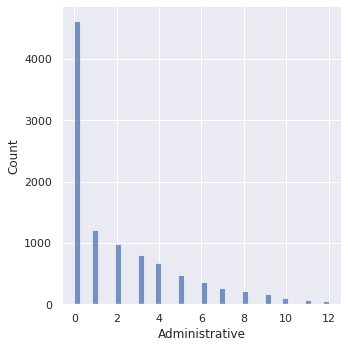

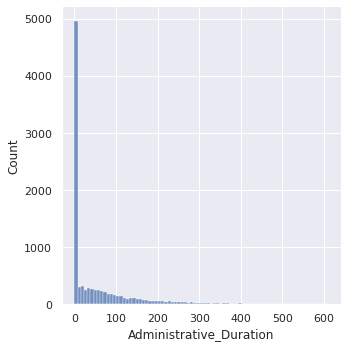

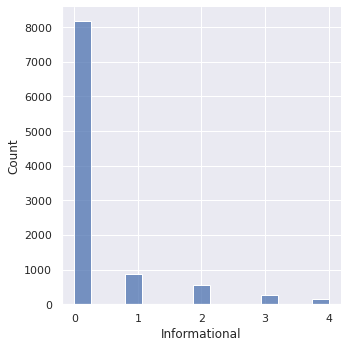

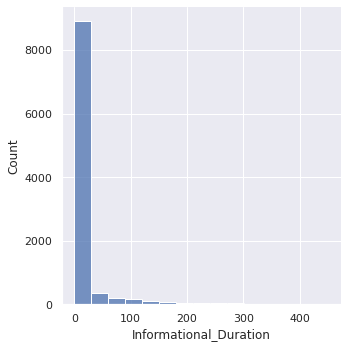

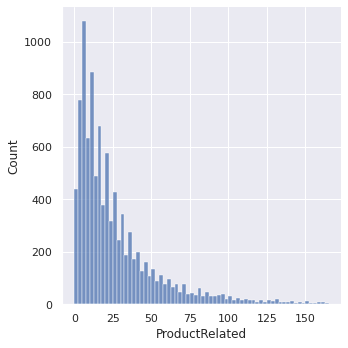

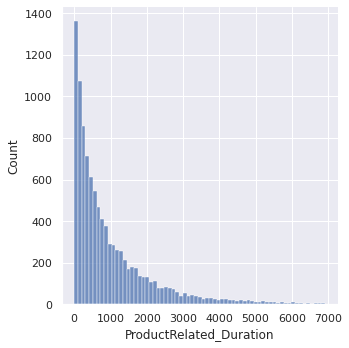

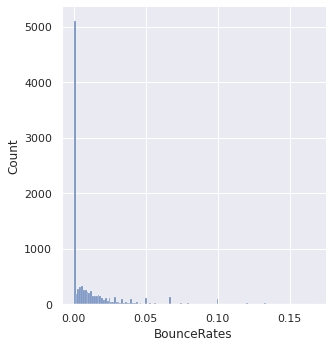

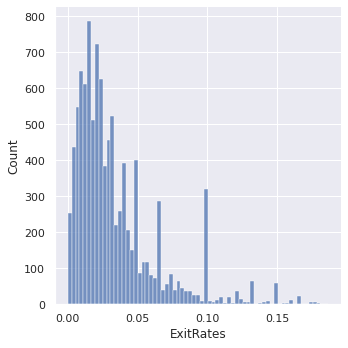

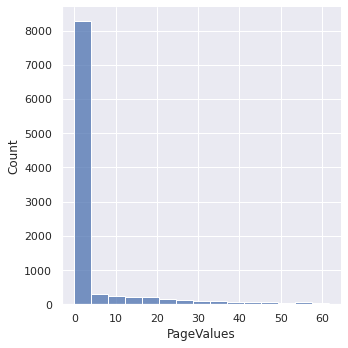

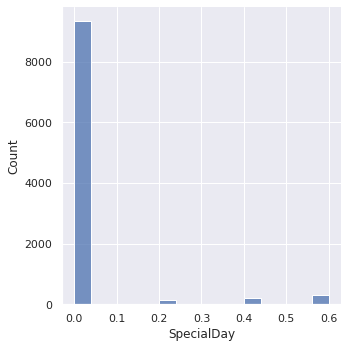

In [21]:
for col in num_features :
    sns.displot(df_no_outlier[col])

Text(0.5, 1.0, 'PageValues and ProductRelated_Duration')

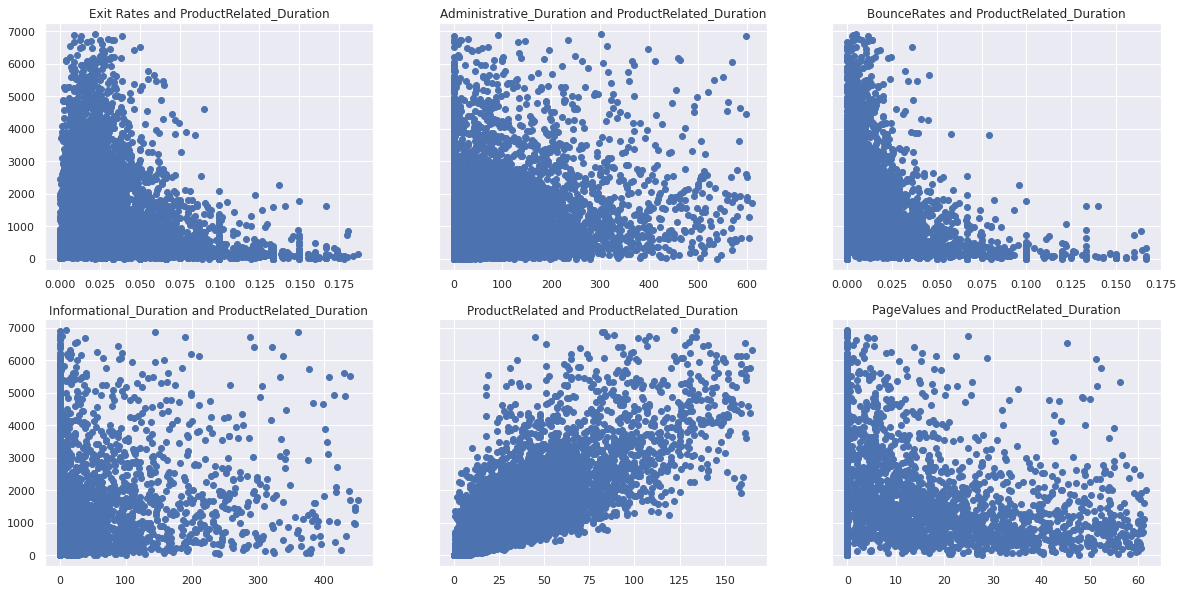

In [22]:
fig, axs = plt.subplots(2, 3, sharey=True ,figsize=(20,10)) # sharey ->ProductRelated_Duration as y
axs[0,0].scatter(df_no_outlier['ExitRates'], df_no_outlier['ProductRelated_Duration'])
axs[0,0].set_title("Exit Rates and ProductRelated_Duration")
axs[0,1].scatter(df_no_outlier['Administrative_Duration'], df_no_outlier['ProductRelated_Duration'])
axs[0,1].set_title("Administrative_Duration and ProductRelated_Duration")
axs[0,2].scatter(df_no_outlier['BounceRates'], df_no_outlier['ProductRelated_Duration'])
axs[0,2].set_title("BounceRates and ProductRelated_Duration")

axs[1,0].scatter(df_no_outlier['Informational_Duration'], df_no_outlier['ProductRelated_Duration'])
axs[1,0].set_title("Informational_Duration and ProductRelated_Duration")

axs[1,1].scatter(df_no_outlier['ProductRelated'], df_no_outlier['ProductRelated_Duration'])
axs[1,1].set_title("ProductRelated and ProductRelated_Duration")

axs[1,2].scatter(df_no_outlier['PageValues'], df_no_outlier['ProductRelated_Duration'])
axs[1,2].set_title("PageValues and ProductRelated_Duration")

In [23]:
df_no_outlier['ProductRelated_Duration'].max()

6919.899495000001

In [24]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=False)
transformed_bounce_rate = pt.fit_transform(df_no_outlier['ProductRelated_Duration'].values.reshape(-1,1))
transformed_bounce_rate

array([[ 6.561406  ],
       [ 1.48623004],
       [13.2680771 ],
       ...,
       [ 9.2781316 ],
       [11.20472233],
       [ 4.31737557]])

In [25]:
df_no_outlier['pt_ProductRelated_Duration'] = transformed_bounce_rate
# df_no_outlier['pt_ProductRelated_Duration'] = np.sqrt(df_no_outlier['ProductRelated_Duration'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


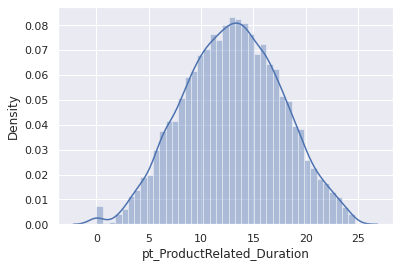

In [26]:
sns.distplot(df_no_outlier['pt_ProductRelated_Duration'])

In [27]:
df_no_outlier['pt_ProductRelated_Duration'].describe()

count    10029.000000
mean        13.007045
std          4.640287
min          0.000000
25%          9.712672
50%         13.041909
75%         16.300383
max         24.655004
Name: pt_ProductRelated_Duration, dtype: float64

Text(0.5, 1.0, 'PageValues and ProductRelated_Duration')

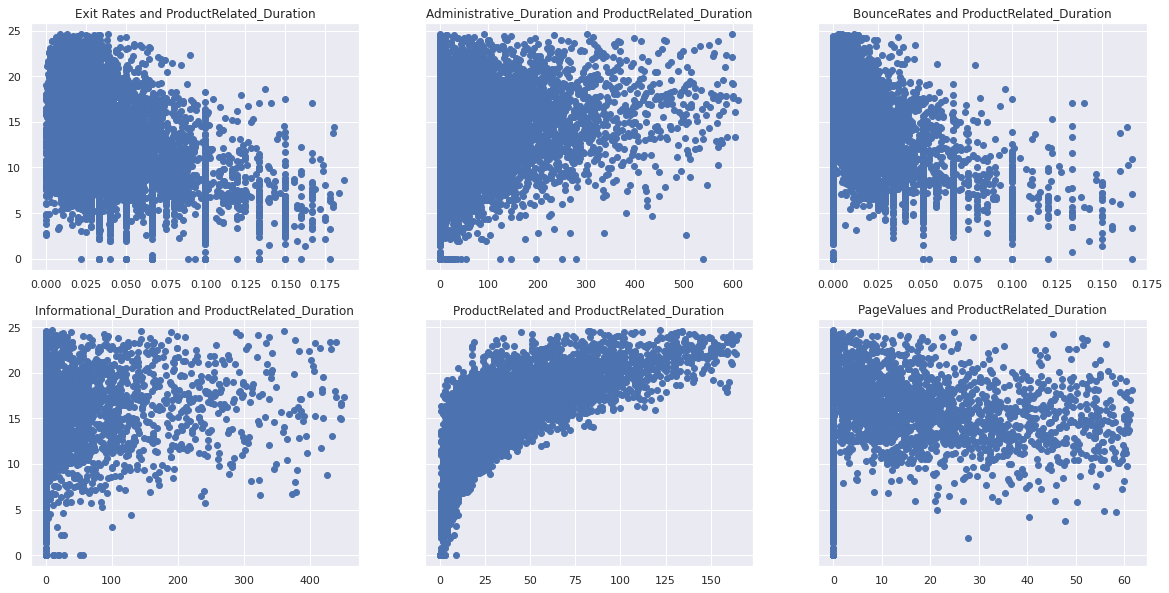

In [28]:
fig, axs = plt.subplots(2, 3, sharey=True ,figsize=(20,10)) # sharey ->pt_ProductRelated_Duration as y
axs[0,0].scatter(df_no_outlier['ExitRates'], df_no_outlier['pt_ProductRelated_Duration'])
axs[0,0].set_title("Exit Rates and ProductRelated_Duration")
axs[0,1].scatter(df_no_outlier['Administrative_Duration'], df_no_outlier['pt_ProductRelated_Duration'])
axs[0,1].set_title("Administrative_Duration and ProductRelated_Duration")
axs[0,2].scatter(df_no_outlier['BounceRates'], df_no_outlier['pt_ProductRelated_Duration'])
axs[0,2].set_title("BounceRates and ProductRelated_Duration")

axs[1,0].scatter(df_no_outlier['Informational_Duration'], df_no_outlier['pt_ProductRelated_Duration'])
axs[1,0].set_title("Informational_Duration and ProductRelated_Duration")

axs[1,1].scatter(df_no_outlier['ProductRelated'], df_no_outlier['pt_ProductRelated_Duration'])
axs[1,1].set_title("ProductRelated and ProductRelated_Duration")

axs[1,2].scatter(df_no_outlier['PageValues'], df_no_outlier['pt_ProductRelated_Duration'])
axs[1,2].set_title("PageValues and ProductRelated_Duration")

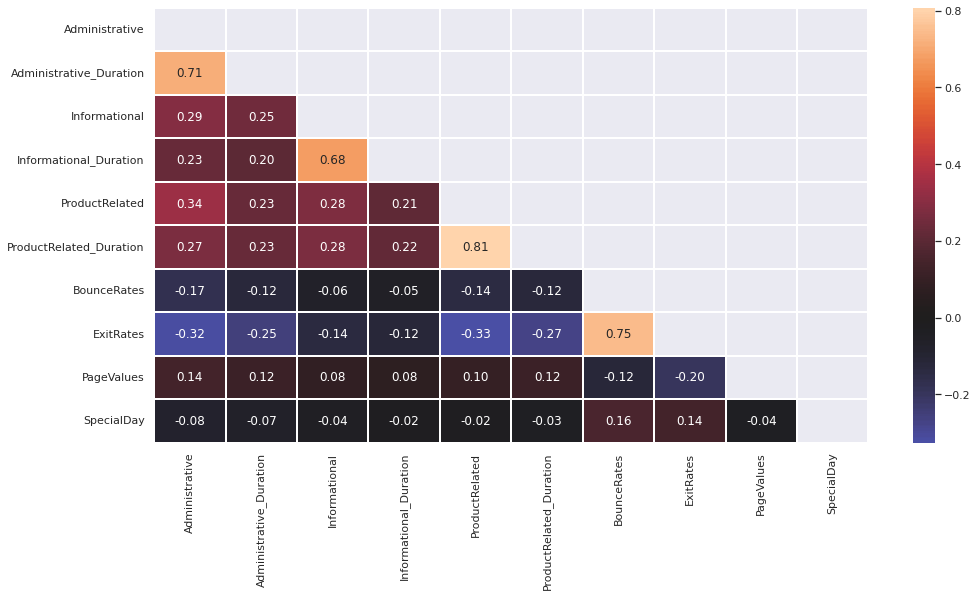

In [29]:
# Create the correlation matrix
corr = df_no_outlier[num_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 8))
sns.heatmap(corr, mask=mask,  center=0, linewidths=1, annot=True, fmt=".2f")

plt.show()

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_no_outlier[num_features]
vif=pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [31]:
vif

,VIF,Features
0,3.400874,Administrative
1,2.805212,Administrative_Duration
2,2.301450,Informational
3,2.022444,Informational_Duration
4,5.657505,ProductRelated
5,5.195695,ProductRelated_Duration
6,2.704091,BounceRates
7,3.010034,ExitRates
8,1.151844,PageValues
9,1.094581,SpecialDay


In [32]:
df_dummies = pd.get_dummies(df_no_outlier,columns=cat_features ,drop_first=True, prefix_sep='_DM_')

In [33]:
df_dummies.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,pt_ProductRelated_Duration,Month_DM_Dec,Month_DM_Feb,Month_DM_Jul,Month_DM_June,Month_DM_Mar,Month_DM_May,Month_DM_Nov,Month_DM_Oct,Month_DM_Sep,OperatingSystems_DM_2,OperatingSystems_DM_3,OperatingSystems_DM_4,OperatingSystems_DM_5,OperatingSystems_DM_6,OperatingSystems_DM_7,OperatingSystems_DM_8,Browser_DM_2,Browser_DM_3,Browser_DM_4,Browser_DM_5,Browser_DM_6,Browser_DM_7,Browser_DM_8,Browser_DM_9,Browser_DM_10,Browser_DM_11,Browser_DM_12,Browser_DM_13,Region_DM_2,Region_DM_3,Region_DM_4,Region_DM_5,Region_DM_6,Region_DM_7,Region_DM_8,Region_DM_9,TrafficType_DM_2,TrafficType_DM_3,TrafficType_DM_4,TrafficType_DM_5,TrafficType_DM_6,TrafficType_DM_7,TrafficType_DM_8,TrafficType_DM_9,TrafficType_DM_10,TrafficType_DM_11,TrafficType_DM_12,TrafficType_DM_13,TrafficType_DM_14,TrafficType_DM_15,TrafficType_DM_16,TrafficType_DM_18,TrafficType_DM_19,TrafficType_DM_20,VisitorType_DM_Other,VisitorType_DM_Returning_Visitor,Weekend_DM_True,Revenue_DM_True
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,6.561406,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,1.486230,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,13.268077,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,8.777937,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,13.875080,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
df_dummies.columns.values

array(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'pt_ProductRelated_Duration',
       'Month_DM_Dec', 'Month_DM_Feb', 'Month_DM_Jul', 'Month_DM_June',
       'Month_DM_Mar', 'Month_DM_May', 'Month_DM_Nov', 'Month_DM_Oct',
       'Month_DM_Sep', 'OperatingSystems_DM_2', 'OperatingSystems_DM_3',
       'OperatingSystems_DM_4', 'OperatingSystems_DM_5',
       'OperatingSystems_DM_6', 'OperatingSystems_DM_7',
       'OperatingSystems_DM_8', 'Browser_DM_2', 'Browser_DM_3',
       'Browser_DM_4', 'Browser_DM_5', 'Browser_DM_6', 'Browser_DM_7',
       'Browser_DM_8', 'Browser_DM_9', 'Browser_DM_10', 'Browser_DM_11',
       'Browser_DM_12', 'Browser_DM_13', 'Region_DM_2', 'Region_DM_3',
       'Region_DM_4', 'Region_DM_5', 'Region_DM_6', 'Region_DM_7',
       'Region_DM_8', 'Region_DM_9', 'TrafficType_DM_2',
       'TrafficType_

In [35]:
cols = [ 'pt_ProductRelated_Duration',  'Informational_Duration','Administrative', 'Administrative_Duration', 'Informational',
       'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay',
       'Month_DM_Dec', 'Month_DM_Feb', 'Month_DM_Jul', 'Month_DM_June',
       'Month_DM_Mar', 'Month_DM_May', 'Month_DM_Nov', 'Month_DM_Oct',
       'Month_DM_Sep', 'OperatingSystems_DM_2', 'OperatingSystems_DM_3',
       'OperatingSystems_DM_4', 'OperatingSystems_DM_5',
       'OperatingSystems_DM_6', 'OperatingSystems_DM_7',
       'OperatingSystems_DM_8', 'Browser_DM_2', 'Browser_DM_3',
       'Browser_DM_4', 'Browser_DM_5', 'Browser_DM_6', 'Browser_DM_7',
       'Browser_DM_8', 'Browser_DM_9', 'Browser_DM_10', 'Browser_DM_11',
       'Browser_DM_12', 'Browser_DM_13', 'Region_DM_2', 'Region_DM_3',
       'Region_DM_4', 'Region_DM_5', 'Region_DM_6', 'Region_DM_7',
       'Region_DM_8', 'Region_DM_9', 'TrafficType_DM_2',
       'TrafficType_DM_3', 'TrafficType_DM_4', 'TrafficType_DM_5',
       'TrafficType_DM_6', 'TrafficType_DM_7', 'TrafficType_DM_8',
       'TrafficType_DM_9', 'TrafficType_DM_10', 'TrafficType_DM_11',
       'TrafficType_DM_12', 'TrafficType_DM_13', 'TrafficType_DM_14',
       'TrafficType_DM_15', 'TrafficType_DM_16', 'TrafficType_DM_18',
       'TrafficType_DM_19', 'TrafficType_DM_20', 'VisitorType_DM_Other',
       'VisitorType_DM_Returning_Visitor', 'Weekend_DM_True',
       'Revenue_DM_True']

In [36]:
data_preprocessed=df_dummies[cols]

In [37]:
data_preprocessed.head()

,pt_ProductRelated_Duration,Informational_Duration,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_DM_Dec,Month_DM_Feb,Month_DM_Jul,Month_DM_June,Month_DM_Mar,Month_DM_May,Month_DM_Nov,Month_DM_Oct,Month_DM_Sep,OperatingSystems_DM_2,OperatingSystems_DM_3,OperatingSystems_DM_4,OperatingSystems_DM_5,OperatingSystems_DM_6,OperatingSystems_DM_7,OperatingSystems_DM_8,Browser_DM_2,Browser_DM_3,Browser_DM_4,Browser_DM_5,Browser_DM_6,Browser_DM_7,Browser_DM_8,Browser_DM_9,Browser_DM_10,Browser_DM_11,Browser_DM_12,Browser_DM_13,Region_DM_2,Region_DM_3,Region_DM_4,Region_DM_5,Region_DM_6,Region_DM_7,Region_DM_8,Region_DM_9,TrafficType_DM_2,TrafficType_DM_3,TrafficType_DM_4,TrafficType_DM_5,TrafficType_DM_6,TrafficType_DM_7,TrafficType_DM_8,TrafficType_DM_9,TrafficType_DM_10,TrafficType_DM_11,TrafficType_DM_12,TrafficType_DM_13,TrafficType_DM_14,TrafficType_DM_15,TrafficType_DM_16,TrafficType_DM_18,TrafficType_DM_19,TrafficType_DM_20,VisitorType_DM_Other,VisitorType_DM_Returning_Visitor,Weekend_DM_True,Revenue_DM_True
1,6.561406,0.0,0,0.0,0,2,64.000000,0.000000,0.100000,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.486230,0.0,0,0.0,0,2,2.666667,0.050000,0.140000,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,13.268077,0.0,0,0.0,0,10,627.500000,0.020000,0.050000,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5,8.777937,0.0,0,0.0,0,19,154.216667,0.015789,0.024561,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,13.875080,0.0,0,0.0,0,3,738.000000,0.000000,0.022222,0.0,0.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
data_selected = data_preprocessed.drop(['ProductRelated_Duration', 'Administrative', 'Informational', 'ProductRelated'], axis=1)

In [39]:
X=  data_preprocessed.drop(['pt_ProductRelated_Duration'], axis=1)
y = data_preprocessed['pt_ProductRelated_Duration']

In [40]:
X.head()

,Informational_Duration,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_DM_Dec,Month_DM_Feb,Month_DM_Jul,Month_DM_June,Month_DM_Mar,Month_DM_May,Month_DM_Nov,Month_DM_Oct,Month_DM_Sep,OperatingSystems_DM_2,OperatingSystems_DM_3,OperatingSystems_DM_4,OperatingSystems_DM_5,OperatingSystems_DM_6,OperatingSystems_DM_7,OperatingSystems_DM_8,Browser_DM_2,Browser_DM_3,Browser_DM_4,Browser_DM_5,Browser_DM_6,Browser_DM_7,Browser_DM_8,Browser_DM_9,Browser_DM_10,Browser_DM_11,Browser_DM_12,Browser_DM_13,Region_DM_2,Region_DM_3,Region_DM_4,Region_DM_5,Region_DM_6,Region_DM_7,Region_DM_8,Region_DM_9,TrafficType_DM_2,TrafficType_DM_3,TrafficType_DM_4,TrafficType_DM_5,TrafficType_DM_6,TrafficType_DM_7,TrafficType_DM_8,TrafficType_DM_9,TrafficType_DM_10,TrafficType_DM_11,TrafficType_DM_12,TrafficType_DM_13,TrafficType_DM_14,TrafficType_DM_15,TrafficType_DM_16,TrafficType_DM_18,TrafficType_DM_19,TrafficType_DM_20,VisitorType_DM_Other,VisitorType_DM_Returning_Visitor,Weekend_DM_True,Revenue_DM_True
1,0.0,0,0.0,0,2,64.000000,0.000000,0.100000,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.0,0,0.0,0,2,2.666667,0.050000,0.140000,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.0,0,0.0,0,10,627.500000,0.020000,0.050000,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5,0.0,0,0.0,0,19,154.216667,0.015789,0.024561,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0.0,0,0.0,0,3,738.000000,0.000000,0.022222,0.0,0.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
y.head()

1     6.561406
3     1.486230
4    13.268077
5     8.777937
9    13.875080
Name: pt_ProductRelated_Duration, dtype: float64

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.02, random_state=42 )

In [44]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_hat = reg.predict(X_train)


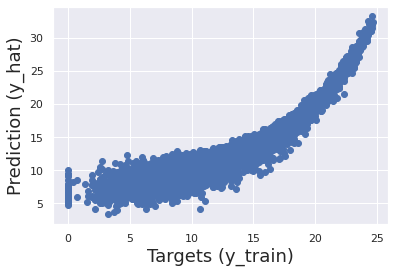

In [46]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Prediction (y_hat)',   size=18) 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual PDF')

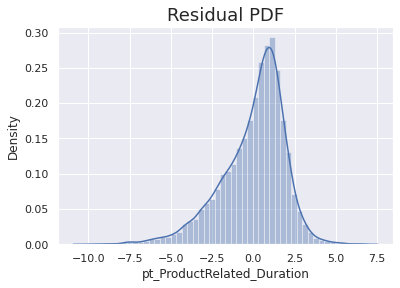

In [47]:
sns.distplot(y_train -  y_hat)
plt.title("Residual PDF", size=18)

In [48]:
reg.score(X_train, y_train)

0.8272866559078311

In [49]:
reg.intercept_

13.004176364546487

In [50]:
reg.coef_

array([-4.81604849e-02, -9.20729929e-02,  1.11532038e-01,  3.51924672e-02,
        1.80366734e-01,  3.44570574e+00,  7.35987496e-01, -1.68016301e+00,
        2.05328982e-01,  1.38726044e-02, -2.79961585e-03, -3.31342127e-02,
       -2.64423162e-02, -6.87402515e-03, -9.30412155e-02, -3.77910390e-02,
       -4.77300656e-02, -9.42387386e-02, -7.32180247e-02,  7.03123864e-02,
        9.04548947e-03,  4.57054961e-02, -2.19816145e+12,  4.58264524e-03,
        3.53346055e-02, -4.03145714e-03, -2.04852264e-02,  3.63996013e-02,
       -3.93444575e-03,  5.72791760e-03,  1.99962295e-02,  2.84211933e-03,
        2.14498689e-02,  2.74734497e-02, -1.86996460e-02,  2.19816145e+12,
        3.91693115e-02,  1.52587891e-02,  3.15551758e-02,  5.84106445e-02,
        4.03594971e-02, -4.66918945e-03,  1.53198242e-02,  3.13873291e-02,
       -5.18798828e-04, -1.26647949e-02, -9.86328125e-02, -5.00793457e-02,
       -1.67541504e-02, -1.55029297e-01, -4.24957275e-02, -1.81961060e-02,
       -5.33752441e-02, -

In [51]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary.sort_values(by='Weights',ascending=False)

,Features,Weights
35,Browser_DM_11,2.198161e+12
5,ProductRelated_Duration,3.445706e+00
6,BounceRates,7.359875e-01
65,VisitorType_DM_Returning_Visitor,3.040771e-01
8,PageValues,2.053290e-01
...,...,...
17,Month_DM_Oct,-9.423874e-02
46,TrafficType_DM_2,-9.863281e-02
49,TrafficType_DM_5,-1.550293e-01
7,ExitRates,-1.680163e+00


In [52]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
count,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000,9828.000000
mean,0.000619,0.001343,0.002264,-0.001300,0.000346,0.000090,-0.000442,0.000184,0.001319,0.000302,0.000636,-0.006739,0.000277,0.001216,0.000821,-0.001069,-0.000313,0.000701,0.000956,0.001013,0.000501,-0.002497,0.000500,0.000708,0.000409,0.000060,0.002372,-0.002549,0.001017,-0.002784,0.000669,-0.000249,0.001162,0.000204,-0.000297,0.000500,-0.005802,-0.000434,0.001251,0.000334,-0.001346,0.000033,-0.000658,0.001410,-0.001948,0.001620,0.000539,0.000932,-0.002432,-0.000929,0.002313,0.001228,-0.000668,0.001193,-0.001173,-0.000609,0.000204,0.000406,0.000678,-0.002865,0.000289,0.000578,-0.001961,-0.000029,0.000141,-0.001266,0.000236,0.001158
std,1.003936,1.001648,1.002017,0.999218,1.001825,1.001502,1.000322,1.000068,1.002468,1.000588,1.000690,0.970333,1.000725,1.003822,1.000795,0.999436,0.999862,1.001550,1.002328,0.999975,1.000419,0.994216,1.010219,1.010213,1.010221,1.000463,0.999342,0.986285,1.001901,0.993345,1.002839,0.998135,1.005520,1.010224,0.998784,1.010219,0.903656,0.996493,1.001810,1.000307,0.998191,1.000151,0.998907,1.002626,0.995243,1.003819,1.000258,1.000886,0.996451,0.997091,1.005794,1.010188,0.998185,1.010190,0.997240,0.997994,1.010224,1.000849,1.010214,0.972162,1.010223,1.010217,0.973513,0.999936,1.000994,1.001244,1.000204,1.001222
min,-0.290954,-0.753435,-0.611479,-0.411954,-0.973173,-0.878201,-0.532400,-1.133830,-0.375263,-0.254755,-0.412277,-0.113701,-0.197089,-0.156914,-0.443114,-0.578847,-0.565336,-0.222234,-0.201148,-1.077261,-0.506100,-0.205667,-0.024467,-0.034612,-0.019975,-0.072194,-1.340996,-0.092455,-0.256478,-0.200073,-0.118119,-0.064850,-0.104823,-0.009986,-0.115930,-0.024467,-0.031593,-0.060852,-0.318943,-0.493010,-0.324228,-0.160545,-0.267133,-0.255594,-0.195445,-0.205403,-0.687208,-0.446491,-0.306842,-0.153546,-0.193235,-0.060021,-0.173782,-0.058324,-0.200611,-0.145173,-0.009986,-0.239486,-0.033136,-0.051956,-0.014123,-0.028255,-0.037389,-0.122386,-0.074259,-2.318559,-0.544586,-0.410620
25%,-0.290954,-0.753435,-0.611479,-0.411954,-0.684414,-0.689457,-0.532400,-0.670272,-0.375263,-0.254755,-0.412277,-0.113701,-0.197089,-0.156914,-0.443114,-0.578847,-0.565336,-0.222234,-0.201148,-1.077261,-0.506100,-0.205667,-0.024467,-0.034612,-0.019975,-0.072194,-1.340996,-0.092455,-0.256478,-0.200073,-0.118119,-0.064850,-0.104823,-0.009986,-0.115930,-0.024467,-0.031593,-0.060852,-0.318943,-0.493010,-0.324228,-0.160545,-0.267133,-0.255594,-0.195445,-0.205403,-0.687208,-0.446491,-0.306842,-0.153546,-0.193235,-0.060021,-0.173782,-0.058324,-0.200611,-0.145173,-0.009986,-0.239486,-0.033136,-0.051956,-0.014123,-0.028255,-0.037389,-0.122386,-0.074259,0.431302,-0.544586,-0.410620
50%,-0.290954,-0.384786,-0.520760,-0.411954,-0.323465,-0.356568,-0.518350,-0.306183,-0.375263,-0.254755,-0.412277,-0.113701,-0.197089,-0.156914,-0.443114,-0.578847,-0.565336,-0.222234,-0.201148,0.928280,-0.506100,-0.205667,-0.024467,-0.034612,-0.019975,-0.072194,0.745714,-0.092455,-0.256478,-0.200073,-0.118119,-0.064850,-0.104823,-0.009986,-0.115930,-0.0244

In [53]:
pd.DataFrame(X_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,2.010000e+02,2.010000e+02,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,2.010000e+02,201.000000,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,2.010000e+02,201.000000,201.000000,201.000000,201.000000,2.010000e+02,201.000000,2.010000e+02,201.000000,2.010000e+02,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,-0.030261,-0.065657,-0.110711,0.063542,-0.016928,-0.004416,0.021597,-0.008992,-0.064491,-0.014766,-0.031075,0.329516,-0.013524,-0.059454,-0.040148,0.052263,0.015309,-0.034294,-0.046742,-0.049546,-0.024519,0.122107,-2.446678e-02,-3.461161e-02,-1.997505e-02,-0.002922,-0.115962,0.124631,-0.049740,0.136133,-0.032704,0.012191,-0.056840,-9.986029e-03,0.014545,-2.446678e-02,0.283675,0.021209,-0.061160,-0.016334,0.065796,-0.001607,0.032165,-0.068965,0.095260,-0.079188,-0.026377,-0.045569,0.118930,0.045448,-0.113111,-6.002101e-02,0.032669,-0.058324,0.057368,0.029790,-9.986029e-03,-0.019830,-3.313644e-02,0.140072,-1.412308e-02,-2.825462e-02,0.095863,0.001395,-0.006892,0.061918,-0.011562,-0.056645
std,0.788332,0.918437,0.893853,1.040539,0.911138,0.928578,0.988859,1.001601,0.873465,0.975706,0.970131,1.941855,0.968780,0.793747,0.964470,1.030820,1.011574,0.925415,0.882448,1.004963,0.983960,1.249584,1.217338e-16,1.182557e-16,3.478110e-17,0.982105,1.029981,1.527277,0.905777,1.281727,0.854135,1.092238,0.680284,1.912960e-17,1.062630,1.217338e-16,3.152637,1.163409,0.910016,0.989711,1.087730,0.997596,1.056568,0.864155,1.211200,0.792208,0.991939,0.959578,1.159155,1.137268,0.652553,2.991174e-16,1.089564,0.000000,1.130276,1.098177,2.086866e-17,0.962372,1.530368e-16,1.920264,4.869354e-17,1.391244e-17,1.889166,1.008107,0.955088,0.940057,0.994916,0.941548
min,-0.290954,-0.753435,-0.611479,-0.411954,-0.937078,-0.878201,-0.532400,-1.133830,-0.375263,-0.254755,-0.412277,-0.113701,-0.197089,-0.156914,-0.443114,-0.578847,-0.565336,-0.222234,-0.201148,-1.077261,-0.506100,-0.205667,-2.446678e-02,-3.461161e-02,-1.997505e-02,-0.072194,-1.340996,-0.092455,-0.256478,-0.200073,-0.118119,-0.064850,-0.104823,-9.986029e-03,-0.115930,-2.446678e-02,-0.031593,-0.060852,-0.318943,-0.493010,-0.324228,-0.160545,-0.267133,-0.255594,-0.195445,-0.205403,-0.687208,-0.446491,-0.306842,-0.153546,-0.193235,-6.002101e-02,-0.173782,-0.058324,-0.200611,-0.145173,-9.986029e-03,-0.239486,-3.313644e-02,-0.051956,-1.412308e-02,-2.825462e-02,-0.037389,-0.122386,-0.074259,-2.318559,-0.544586,-0.410620
25%,-0.290954,-0.753435,-0.611479,-0.411954,-0.648319,-0.655756,-0.532400,-0.657462,-0.375263,-0.254755,-0.412277,-0.113701,-0.197089,-0.156914,-0.443114,-0.578847,-0.565336,-0.222234,-0.201148,-1.077261,-0.506100,-0.205667,-2.446678e-02,-3.461161e-02,-1.997505e-02,-0.072194,-1.340996,-0.092455,-0.256478,-0.200073,-0.118119,-0.064850,-0.104823,-9.986029e-03,-0.115930,-2.446678e-02,-0.031593,-0.060852,-0.318943,-0.493010,-0.324228,-0.160545,-0.267133,-0.255594,-0.195445,-0.205403,-0.687208,-0.446491,-0.306842,-0.153546,-0.193235,-6.002101e-02,-0.173782,-0.058324,-0.200611,-0.145173,-9.986029e-03,-0.239486,-3.313644e-02,-0.051956,-1.412308e-02,-2.825462e-02,-0.037389,-0.122386,-0.074259,0.431302,-0.544586,-0.410620
50%,-0.290954,-0.384786,-0.551000,-0.411954,-0.287370,-0.313312,-0.376164,-0.277688,-0.375263,-0.254755,-0.412277,-0.113701,-0.197089,-0.156914,-0.443114,-0.578847,-0.565336,-0.222234,-0.201148,0.928280,-0.506100,-0.205667,-2.4

In [54]:
y_hat_test = reg.predict(X_test)

In [55]:
y.describe()

count    10029.000000
mean        13.007045
std          4.640287
min          0.000000
25%          9.712672
50%         13.041909
75%         16.300383
max         24.655004
Name: pt_ProductRelated_Duration, dtype: float64

In [56]:
pd.DataFrame(y_hat_test).describe()

,0
count,201.000000
mean,13.036046
std,3.896191
min,4.994182
25%,10.723834
50%,12.380359
75%,14.343646
max,31.681850


In [57]:
print(y_hat_test.min())
print(y_hat_test.max())

4.994181857710549
31.68184970439024


In [58]:
print(y_test.min())
print(y_test.max())

0.0
24.266888369261046


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


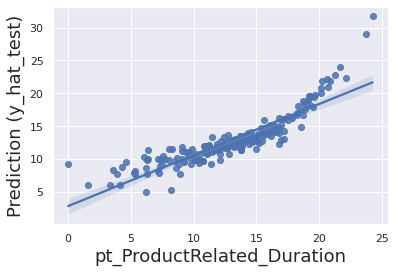

In [59]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Prediction (y_hat_test)', size=18)
sns.regplot(y_test, y_hat_test)

In [60]:
df_perform = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_perform.head()

,Prediction
0,13.397281
1,12.109988
2,12.403774
3,12.688586
4,20.831241


In [61]:
df_perform['Target'] = pd.DataFrame(y_test).reset_index(drop=True)
df_perform.head()

,Prediction,Target
0,13.397281,16.145442
1,12.109988,11.189104
2,12.403774,15.251478
3,12.688586,13.690698
4,20.831241,20.173377


In [62]:
df_perform['Residual'] = df_perform['Target'] - df_perform['Prediction']
df_perform.head()

,Prediction,Target,Residual
0,13.397281,16.145442,2.748161
1,12.109988,11.189104,-0.920884
2,12.403774,15.251478,2.847704
3,12.688586,13.690698,1.002111
4,20.831241,20.173377,-0.657864


In [63]:
df_perform['divider'] = df_perform['Target'].replace(0, 1)

In [64]:
df_perform['Differences'] = np.absolute(df_perform['Residual'] / df_perform['divider'] * 100)
df_perform.head()

,Prediction,Target,Residual,divider,Differences
0,13.397281,16.145442,2.748161,16.145442,17.021282
1,12.109988,11.189104,-0.920884,11.189104,8.230188
2,12.403774,15.251478,2.847704,15.251478,18.671660
3,12.688586,13.690698,1.002111,13.690698,7.319651
4,20.831241,20.173377,-0.657864,20.173377,3.261049


In [65]:
pd.options.display.max_rows=999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_perform.sort_values(by='Differences').head()

,Prediction,Target,Residual,divider,Differences
94,19.73,19.71,-0.01,19.71,0.07
120,11.07,11.06,-0.01,11.06,0.09
136,11.95,11.99,0.03,11.99,0.26
129,8.67,8.63,-0.04,8.63,0.47
61,18.80,18.71,-0.09,18.71,0.49


In [66]:
df_perform.describe()

,Prediction,Target,Residual,divider,Differences
count,201.00,201.00,201.00,201.00,201.00
mean,13.04,13.18,0.14,13.18,20.12
std,3.90,4.49,2.01,4.47,69.34
min,4.99,0.00,-9.24,1.00,0.07
25%,10.72,10.20,-0.82,10.20,3.92
50%,12.38,13.33,0.49,13.33,8.49
75%,14.34,16.54,1.37,16.54,15.91
max,31.68,24.27,4.46,24.27,923.63


In [67]:
df_perform['Differences'].max()

923.6254916792581

In [68]:
reg.score(X_test, y_test)

0.7992494672923218